<a href="https://colab.research.google.com/github/audrey-yung/bio108-work/blob/main/spatial_data_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# author: Audrey Yung
# my github: https://github.com/audrey-yung
# file name: spatial data in python tutorial

In [ ]:
# 3 objectives for this assignment:
    # A) identify an interesting question you can answer with real-world data,
    # B) use the text (markdown) and clear code commenting to walk me through your thought process and question motivation,
    # C) performing one analysis or visualization to answer your question.

# question: where are red-list terrestrial animals most prevalent around the world?

In [ ]:
# necessary package managers
! pip install pygbif
! pip install pyalex
! pip install rasterio
! pip install rasterstats

In [ ]:
# packages needed
import zipfile
import os
from pathlib import Path
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.mask
import rasterio.features
import rasterstats
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling
from rasterio.crs import CRS
import matplotlib.pyplot as plt

In [ ]:
# mount google drive
from google.colab import files

In [ ]:
# data is species richness of all red list Amphibians, Birds, Mammals and Reptiles.
# data can be downloaded at this link: https://www.iucnredlist.org/resources/files/b0de14a7-6f90-4a94-8769-35aa8ac5de8a

# setting path to the zip file that has been uploaded to my google drive
iucn_path = "/content/drive/MyDrive/scripps/year 4/spring 2025/Combined_SR_2024.zip" # this is the one to my google drive

In [ ]:
# making a new directory path in my google drive
richness_dir_path = "/content/richness"
os.makedirs(richness_dir_path, exist_ok=True)

In [ ]:
# unzip the downloaded object
with zipfile.ZipFile(Path(iucn_path)) as zip_file: # this is essentially zip_file = zipfile.ZipFile(Path()) but better
  # Extract all of the files to the richness directory
  zip_file.extractall(richness_dir_path)

In [ ]:
# locating and opening the raster file for richness
richness_raster = rasterio.open("/content/richness/Combined_SR_2024.tif")

In [ ]:
# checking that richness_raster variable is a raster type object
type(richness_raster)

rasterio.io.DatasetReader

In [ ]:
# checking metadata like CRS, number of bands
print(richness_raster.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 1204, 'height': 592, 'count': 1, 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30000.0, 0.0, -18058187.677929368,
       0.0, -30000.0, 8764905.85562796)}


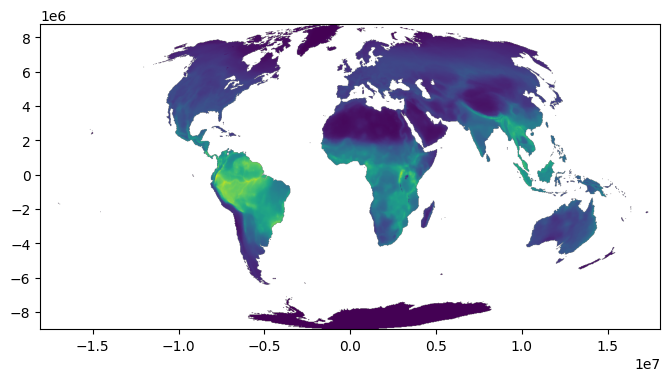

In [ ]:
# plotting the raster data in a simple way
fig, ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(richness_raster)
plt.show()

In [ ]:
# findings: most red-list terrestrial animals are located in low latitude
# regions across the world, including central and south america,
# sub-saharan africa, and asia.